<b>Data visuvilisation of Annamalai university FEAT First year students</b>

In [1]:
#importing modules
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
tqdm.pandas()

<b>Fetch the data from the annamalai university portal</b>

In [2]:
import requests

url = 'https://annamalaiuniversity.ac.in/adm/coun_admlist_be.php?admfor=910955a907e739b81ec8855763108a29'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
r = requests.get(url,headers=header)
dfs = pd.read_html(r.text)
#print(len(dfs))
df=dfs[0]
df["rounds"]="Nan"
display(df.head())
df.to_csv("AUstd.csv")

,0,1,2,3,4,5,6,rounds
0,ONLINE ADMISSION -,NaN,NaN,NaN,NaN,NaN,NaN,Nan
1,SPL The last date for payment of Admission Fee...,NaN,NaN,NaN,NaN,NaN,NaN,Nan
2,Sl.No.,Appl.No.,Name,Branch,DOB,Community,Payment,Nan
3,1,201782,MOHAN K,Computer Science and Engineering (Artificial I...,17/08/2004,BC,NaN,Nan
4,Sl.No.,Appl.No.,Name,Branch,DOB,Community,Payment,Nan


<b>Creating the rounds column to specify the admission round of the student</b>

In [3]:
rounds=["SPL","Round - I","Round - I (Upward)","Round - II","Round - II (Upward)","Round - III","Round - III (Govt 7.5%)","SPL - DAB (Govt 7.5%)","Round - I (Govt 7.5%)","Round - II (Govt 7.5%)","Round - III (Upward) - Govt 7.5%","Round - III (Upward)","Additional","Round - IV","Round - IV (Govt 7.5%)","Round - IV (Upward)","Supplementary","Supplementary (Govt 7.5%)","SCA to SC"]
for i,j in zip(range(1,len(dfs)),rounds):
    dfs[i]["Rounds"]=j

<b>Clean the data </b>

In [4]:
tqdm.pandas()
final=[dfs[i] for i in range(1,len(dfs))]
final=pd.concat(final)
#display(final)
final=final[final[2]!="Name"]
final.columns=["SI.NO","Appl NO","Name","Branch","Dob","Community","Payment","Rounds"]
final.drop(["Payment"],axis=1,inplace=True)
final["SI.NO"]=[i for i in range(1,final.shape[0]+1)]
final.set_index("SI.NO",inplace=True)
display(final.head())

,Appl NO,Name,Branch,Dob,Community,Rounds
SI.NO,,,,,,
1,201782,MOHAN K,Computer Science and Engineering (Artificial I...,17/08/2004,BC,SPL
2,404123,DISHYA S,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I
3,337886,KALAI SELVAN M,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I
4,400218,YOGESWARI MEYYAMMAI M,COMPUTER SCIENCE AND ENGINEERING,NaN,OC,Round - I
5,318082,Niranjana. T,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I


<b>Display the students details based on admission rounds using Bar diagram</b>

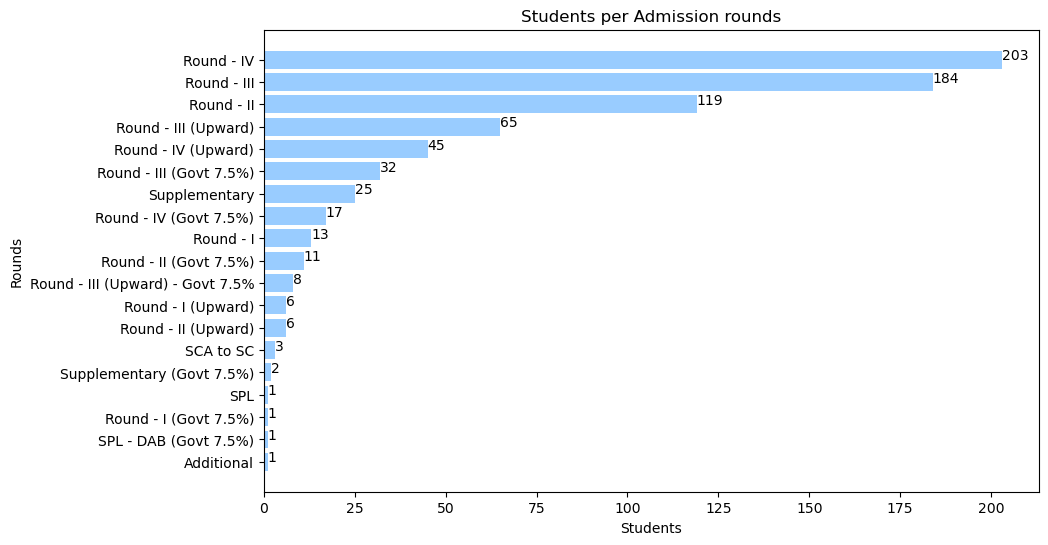

In [5]:
count=final.groupby(["Rounds"]).size().reset_index(name="count")
count.sort_values("count",inplace=True)
plt.figure(figsize = (10,6))
x=count["Rounds"]
y=count["count"]
plt.barh(x,y,color="#99ccff")
plt.title("Students per Admission rounds")
plt.xlabel("Students")
plt.ylabel("Rounds")
for index, value in enumerate(y):
    plt.text(value, index,str(value))
plt.show()

<b>Display the students details based on admission rounds using pie diagram</b>

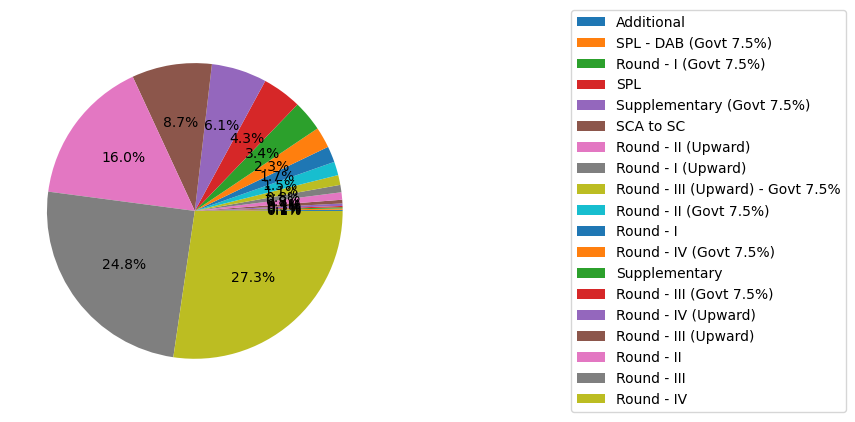

In [6]:
#display(count)
plt.pie(count["count"],autopct = '%1.1f%%')
plt.legend(labels=count["Rounds"],loc="center left",bbox_to_anchor =(1.5, 0,0.5, 1))
plt.show()

In [7]:
final["Branch"]=final["Branch"].str.upper()
final.loc[final["Branch"].str.contains("ARTIFICIAL"),"Branch"]="COMPUTER SCIENCE AND ENGINEERING (AI AND ML)"

<b>Display the details of students based on their departments</b>

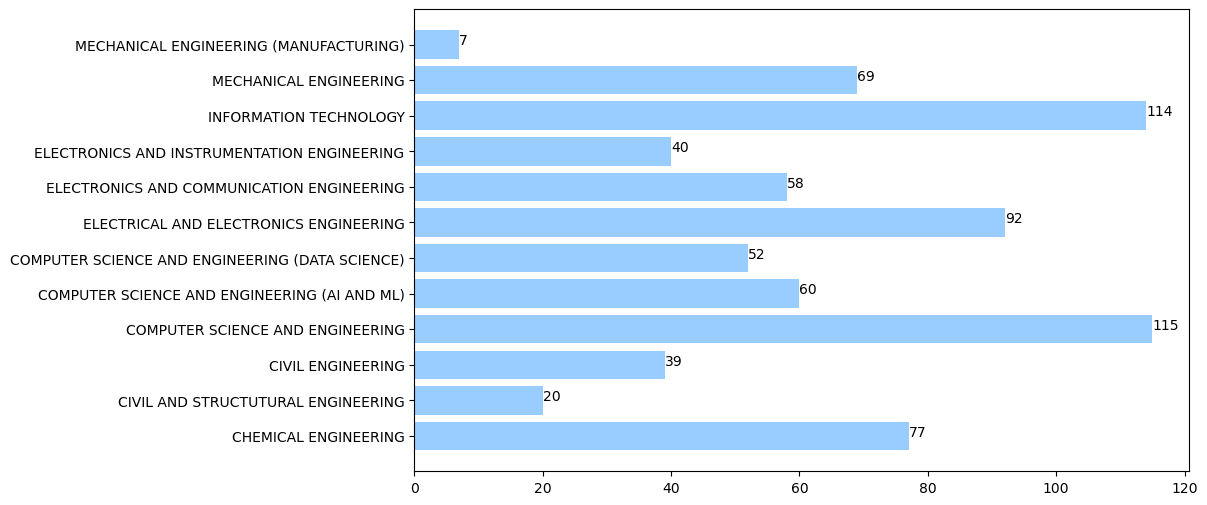

In [8]:
#student strength dep wise
df_dep=final.groupby(["Branch"]).size().reset_index(name="dep")
x=df_dep["Branch"]
y=df_dep["dep"]
plt.figure(figsize = (10,6))
plt.barh(x,y,color="#99ccff")
for index, value in enumerate(y):
    plt.text(value, index,str(value))
plt.show()

<b>display the details of students using pie diagram</b>

In [17]:
df_dep

,Branch,dep
0,CHEMICAL ENGINEERING,77
1,CIVIL AND STRUCTUTURAL ENGINEERING,20
2,CIVIL ENGINEERING,39
3,COMPUTER SCIENCE AND ENGINEERING,115
4,COMPUTER SCIENCE AND ENGINEERING (AI AND ML),60
5,COMPUTER SCIENCE AND ENGINEERING (DATA SCIENCE),52
6,ELECTRICAL AND ELECTRONICS ENGINEERING,92
7,ELECTRONICS AND COMMUNICATION ENGINEERING,58
8,ELECTRONICS AND INSTRUMENTATION ENGINEERING,40
9,INFORMATION TECHNOLOGY,114


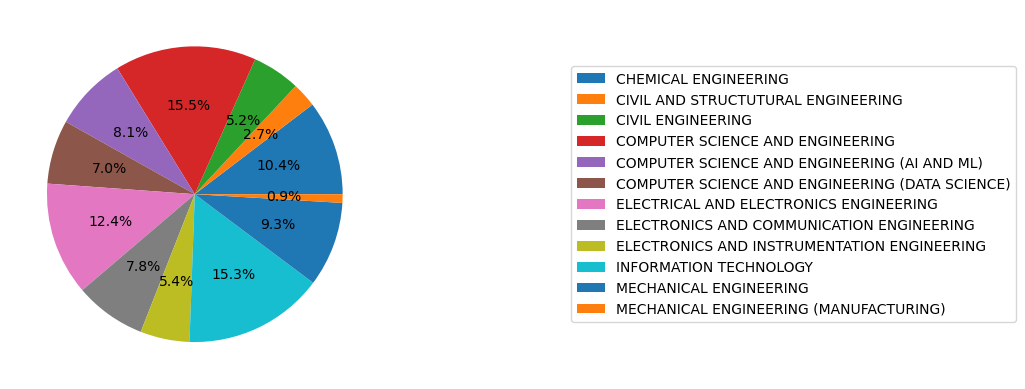

In [9]:
plt.pie(df_dep["dep"],autopct="%1.1f%%")
plt.legend(labels=df_dep["Branch"],loc="center left",bbox_to_anchor =(1.5, 0,0.5, 1))
plt.show()

In [10]:
def find_gender(name):
    name=name.replace("."," ")
    name=name.split()
    if len(name[0])<=2:
        name=name[1]
    else:
        name=name[0]
    try:
        url = "https://genderify3.p.rapidapi.com/genderify"
        querystring = {"text":name}        
        headers = {
            "X-RapidAPI-Key": "8d91f844edmsha62f44d81da11bcp14b4cbjsnc3805772840c",
            "X-RapidAPI-Host": "genderify3.p.rapidapi.com"}
        response = eval(requests.request("GET", url, headers=headers, params=querystring).text)
        return response["gender"]
    except:
        return "NULL"
        

In [12]:

# final["gender"]=final["Name"].progress_apply(find_gender)
# final.to_csv("gender.csv")
print("Creating the gender column using API")

Creating the gender column using API


In [13]:
final=pd.read_csv("gender.csv")
final

,SI.NO,Appl NO,Name,Branch,Dob,Community,Rounds,gender
0,1,201782,MOHAN K,COMPUTER SCIENCE AND ENGINEERING (AI AND ML),17/08/2004,BC,SPL,male
1,2,404123,DISHYA S,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female
2,3,337886,KALAI SELVAN M,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,male
3,4,400218,YOGESWARI MEYYAMMAI M,COMPUTER SCIENCE AND ENGINEERING,NaN,OC,Round - I,female
4,5,318082,Niranjana. T,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female
...,...,...,...,...,...,...,...,...
738,739,600414,PHIZAL I,ELECTRICAL AND ELECTRONICS ENGINEERING,NaN,BC(Muslim),Supplementary (Govt 7.5%),female
739,740,610065,PADMAPRIYA S,ELECTRONICS AND INSTRUMENTATION ENGINEERING,NaN,BC,Supplementary (Govt 7.5%),female
740,741,605532,DHANUSH KUMAR M,ELECTRICAL AND ELECTRONICS ENGINEERING,NaN,SC,SCA to SC,male
741,742,607692,AKASH V,ELECTRICAL AND ELECTRONICS ENGINEERING,NaN,SC,SCA to SC,male


,gender,count
0,female,365
1,male,378


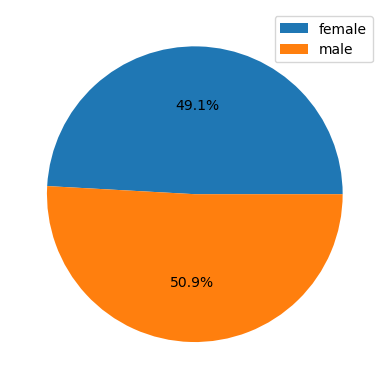

In [21]:
df_gender=final.groupby(["gender"]).size().reset_index(name="count")
display(df_gender)
plt.pie(df_gender["count"],autopct="%1.1f%%")
plt.legend(df_gender["gender"])
plt.show()